In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data_train = pd.read_csv('../data_cleaned/data_train.csv')
item_categories = pd.read_csv('../data_cleaned/item_categories.csv')
items = pd.read_csv('../data_cleaned/items.csv')
shops = pd.read_csv('../data_cleaned/shops.csv')

In [3]:
data_train = data_train.groupby(['shop_id','item_id','date_block_num']).agg({'item_cnt_day':'sum','item_price':'mean'}).reset_index()
data_train=data_train.rename(columns={'item_cnt_day':'item_cnt_month'})
data_train


,shop_id,item_id,date_block_num,item_cnt_month,item_price
0,2,27,0,1.0,2499.0
1,2,27,17,1.0,498.0
2,2,30,2,1.0,359.0
3,2,30,5,1.0,399.0
4,2,30,15,1.0,169.0
...,...,...,...,...,...
1608220,59,22164,27,2.0,699.0
1608221,59,22164,30,1.0,699.0
1608222,59,22167,9,1.0,299.0
1608223,59,22167,11,2.0,299.0


In [4]:
merged = data_train.merge(items, how='left').merge(item_categories, how='left').merge(shops, how='left')
merged.isna().sum()

shop_id               0
item_id               0
date_block_num        0
item_cnt_month        0
item_price            0
item_name             0
item_category_id      0
item_category_name    0
shop_name             0
dtype: int64

In [5]:
merged

,shop_id,item_id,date_block_num,item_cnt_month,item_price,item_name,item_category_id,item_category_name,shop_name
0,2,27,0,1.0,2499.0,"007 Legends [PS3, русская версия]",19,Игры - PS3,"Адыгея ТЦ ""Мега"""
1,2,27,17,1.0,498.0,"007 Legends [PS3, русская версия]",19,Игры - PS3,"Адыгея ТЦ ""Мега"""
2,2,30,2,1.0,359.0,007: КООРДИНАТЫ «СКАЙФОЛЛ»,40,Кино - DVD,"Адыгея ТЦ ""Мега"""
3,2,30,5,1.0,399.0,007: КООРДИНАТЫ «СКАЙФОЛЛ»,40,Кино - DVD,"Адыгея ТЦ ""Мега"""
4,2,30,15,1.0,169.0,007: КООРДИНАТЫ «СКАЙФОЛЛ»,40,Кино - DVD,"Адыгея ТЦ ""Мега"""
...,...,...,...,...,...,...,...,...,...
1608220,59,22164,27,2.0,699.0,ЯРОСТЬ (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1608221,59,22164,30,1.0,699.0,ЯРОСТЬ (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1608222,59,22167,9,1.0,299.0,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,49,Книги - Методические материалы 1С,"Ярославль ТЦ ""Альтаир"""
1608223,59,22167,11,2.0,299.0,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,49,Книги - Методические материалы 1С,"Ярославль ТЦ ""Альтаир"""


In [6]:
def parse_city(shop_name):
    if shop_name.split()[0] == '!Якутск':
        return  'Якутск'

    if shop_name.split()[0] == 'Сергиев':
            return  'Сергиев Посад'
    else:
        return shop_name.split()[0]

def supercategory(name):
    return name.split()[0]

In [7]:
merged['city'] = merged['shop_name'].apply(parse_city)
merged['city'].unique()

array(['Адыгея', 'Балашиха', 'Волжский', 'Вологда', 'Воронеж', 'Выездная',
       'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга', 'Коломна',
       'Красноярск', 'Курск', 'Москва', 'Мытищи', 'Н.Новгород',
       'Новосибирск', 'Омск', 'РостовНаДону', 'СПб', 'Самара',
       'Сергиев Посад', 'Сургут', 'Томск', 'Тюмень', 'Уфа', 'Химки',
       'Цифровой', 'Чехов', 'Якутск', 'Ярославль'], dtype=object)

In [8]:
merged['super_category'] = merged['item_category_name'].apply(supercategory)
merged['super_category'].unique()

array(['Игры', 'Кино', 'Музыка', 'Книги', 'Программы', 'Подарки', 'Карты',
       'Аксессуары', 'Игровые', 'Билеты', 'Чистые', 'Служебные',
       'Элементы', 'Доставка', 'PC'], dtype=object)

In [9]:
merged['month'] = merged['date_block_num'] % 12
merged['year'] = merged['date_block_num'] // 12 + 2013

In [10]:
merged['city_num'] = merged['city'].astype('category')
merged['super_category_num'] = merged['super_category'].astype('category')
merged['city_num'] = merged['city_num'].cat.codes
merged['super_category_num'] =  merged['super_category_num'].cat.codes

In [11]:
#sns.heatmap(merged.drop(['item_name','item_category_name','shop_name','city','super_category'], axis=1).corr(),annot=True,annot_kws={'fontsize':7})

PLOT GENERAL TENDECIES

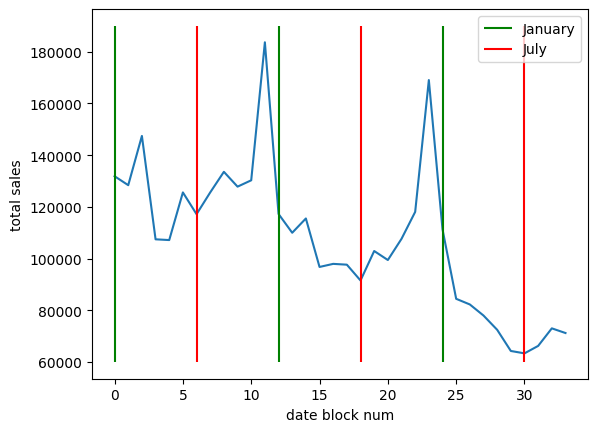

In [12]:
sales_dbn = merged.groupby('date_block_num').agg({'item_cnt_month':'sum'}).reset_index()
plt.plot(sales_dbn['date_block_num'], sales_dbn['item_cnt_month'])
plt.xlabel('date block num')
plt.ylabel('total sales')
plt.vlines([0,12,24], ymin=60000,ymax=190000,label='January',color='green')
plt.vlines([6,18,30], ymin=60000,ymax=190000,label='July', color='red')
plt.legend()
#In the plot below we can see, that there is the deacreasing trend 
#Also we can see, that data have similar behavior during different years

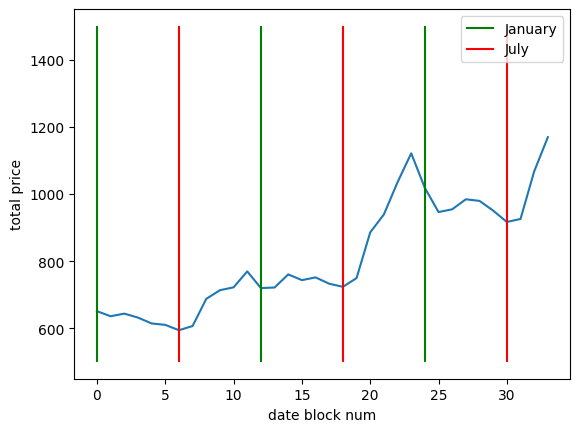

In [13]:
sales_dbn = merged.groupby('date_block_num').agg({'item_price':'mean'}).reset_index()
plt.plot(sales_dbn['date_block_num'], sales_dbn['item_price'])
plt.xlabel('date block num')
plt.ylabel('total price')
plt.vlines([0,12,24], ymin=500,ymax=1500,label='January',color='green')
plt.vlines([6,18,30], ymin=500,ymax=1500,label='July', color='red')
plt.legend()
#In the plot below we can see, that there is the increasing trend 

In [14]:
gr_month = merged.groupby(['month','year']).agg({'item_cnt_month':'sum'}).reset_index()

<Axes: xlabel='month', ylabel='item_cnt_month'>

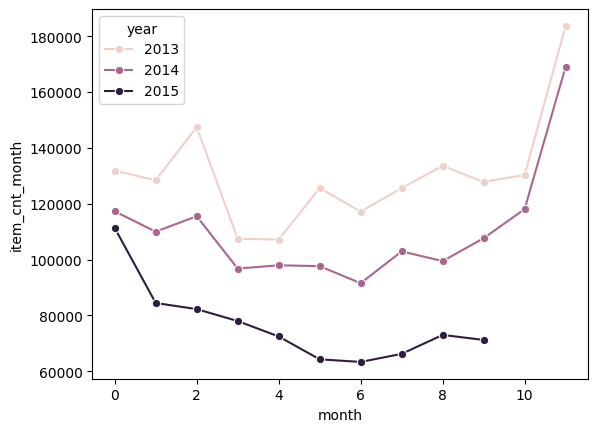

In [15]:
sns.lineplot(x='month', y='item_cnt_month', hue='year', data=gr_month, marker='o')
#In the plot below we can see, that there is some month seasonality

In [16]:
merged['super_category'].unique()

array(['Игры', 'Кино', 'Музыка', 'Книги', 'Программы', 'Подарки', 'Карты',
       'Аксессуары', 'Игровые', 'Билеты', 'Чистые', 'Служебные',
       'Элементы', 'Доставка', 'PC'], dtype=object)

(0.0, 5.0)

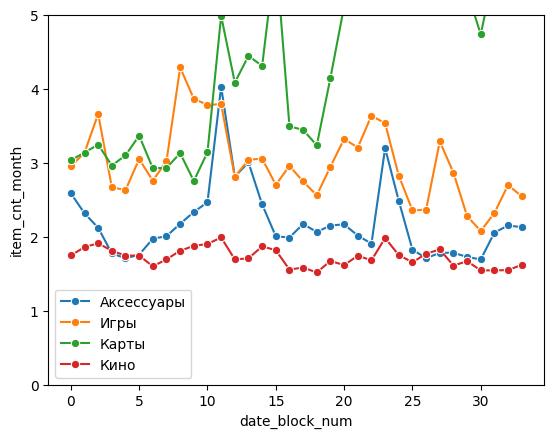

In [17]:
gr_sup_cat = gr_month = merged.groupby(['date_block_num','super_category']).agg({'item_cnt_month':'mean'}).reset_index()
sup_cats_to_draw = ['Кино','Карты','Игры','Аксессуары']
gr_sup_cat = gr_sup_cat[gr_sup_cat['super_category'].isin(sup_cats_to_draw)]
sns.lineplot(x='date_block_num', y='item_cnt_month', hue='super_category', data=gr_sup_cat, marker='o')
plt.xlabel('sales')
plt.xlabel('date_block_num')
plt.legend()
plt.ylim(0,5)
#In the plot below we can see, that different super categories have different sales
#Only few super categories have been chosen for plotting to make plot more clear

In [18]:
merged.groupby(['city']).agg({'item_cnt_month':'sum'}).reset_index()

,city,item_cnt_month
0,Адыгея,30706.0
1,Балашиха,28475.0
2,Волжский,44069.0
3,Вологда,42847.0
4,Воронеж,171518.0
5,Выездная,15874.0
6,Жуковский,25095.0
7,Интернет-магазин,73989.0
8,Казань,66277.0
9,Калуга,71331.0


(1.0, 4.0)

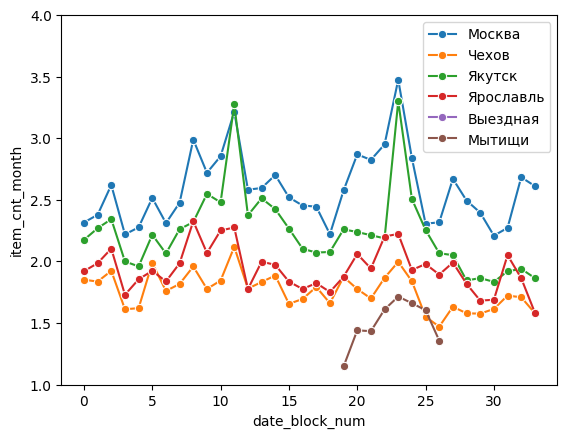

In [19]:
gr_city = merged.groupby(['date_block_num','city']).agg({'item_cnt_month':'mean'}).reset_index()
gr_city_to_draw = ['Ярославль','Выездная', 'Москва','Якутск','Мытищи','Чехов']
gr_city = gr_city[gr_city['city'].isin(gr_city_to_draw)]
sns.lineplot(x='date_block_num', y='item_cnt_month', hue='city', data=gr_city, marker='o')
plt.xlabel('sales')
plt.xlabel('date_block_num')
plt.legend()
plt.ylim(1,4)

#In the plot below we can see, that different cities have different sales
#Only few cities have been chosen for plotting to make plot more clear


In [20]:

def create_lags(data,item_lags=None,price_lags=None):
    lagged_items = data[['date_block_num','item_cnt_month','shop_id','item_id']].copy()
    for lag in item_lags:
        lagged_items['date_block_num']+=lag#previous month becomes present
        data=data.merge(lagged_items, how='left',on=['date_block_num','shop_id','item_id'], suffixes=('', f'_lag_{lag}'))
        lagged_items['date_block_num']-=lag

    lagged_prices = data[['date_block_num','item_price','shop_id','item_id']].copy()
    for lag in price_lags:
        lagged_prices['date_block_num']+=lag#previous month becomes present
        data=data.merge(lagged_prices, how='left',on=['date_block_num','shop_id','item_id'], suffixes=('', f'_lag_{lag}'))
        lagged_prices['date_block_num']-=lag

        
    return data

In [22]:
def create_last_seen(data):#Takes some minutes
    prevs=data.groupby(['item_id'])['date_block_num'].unique().rename('blocks')
    mer = data.merge(prevs, how='left', on='item_id')
    for idx in range(len(mer)):
        curr =  mer.loc[idx,'blocks'] 
        
        prevs = np.array(curr) < mer.loc[idx,'date_block_num']
    
        if sum(prevs) == 0:
            mer.loc[idx,'blocks'] = -1
        else:
            mer.loc[idx,'blocks'] = curr [prevs] .max()

    data['last_seen'] = mer['blocks']
    return data


In [24]:
merged = create_last_seen(merged)#8m 40s

In [42]:
merged = merged.where(merged['last_seen'] != -1, merged['date_block_num'],axis=0) 
merged['dbn_diff'] = merged['date_block_num'] - merged['last_seen']

In [43]:
dbn_diff_cnt = merged.groupby(['dbn_diff']).agg({'item_cnt_month':'mean'}).reset_index()

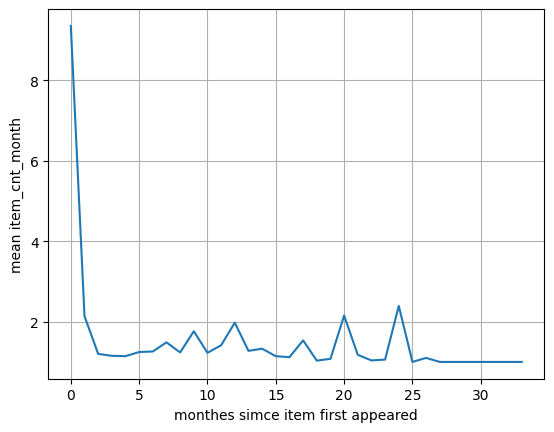

In [46]:
plt.plot(dbn_diff_cnt['dbn_diff'], dbn_diff_cnt['item_cnt_month'])
plt.xlabel('monthes simce item first appeared')
plt.ylabel('mean item_cnt_month')
plt.grid(True)
#Here we can see, that items on avarege have most sales when they entry market